In [71]:
import re
import pandas as pd
import numpy as np

In [78]:
import glob

In [19]:
import matplotlib
import matplotlib.pylab as plt

/home/savchenk/work/reproducible-calibration/cc-crab/log-2
/home/savchenk/work/reproducible-calibration/cc-crab/log-10
/home/savchenk/work/reproducible-calibration/cc-crab/log-9
/home/savchenk/work/reproducible-calibration/cc-crab/log-6
/home/savchenk/work/reproducible-calibration/cc-crab/log-1
/home/savchenk/work/reproducible-calibration/cc-crab/log-5
/home/savchenk/work/reproducible-calibration/cc-crab/log-4
/home/savchenk/work/reproducible-calibration/cc-crab/log-7
/home/savchenk/work/reproducible-calibration/cc-crab/log-3
/home/savchenk/work/reproducible-calibration/cc-crab/log-8


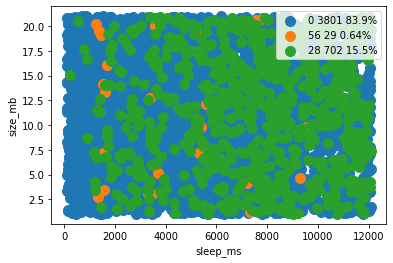

In [448]:
A = []

for f in glob.glob("/home/savchenk/work/reproducible-calibration/cc-crab/log-*"): 
    print(f)
    for l in open(f).read().split("==="):
        D = []
        for e in l.replace("curlout: ", "").split("\n"):
            ss = e.split(":", 1)        
            if len(ss)>1:
            #    print(ss)
                D.append(ss)

        D = dict(D)
        
        try:
            D['time'] = int(D['time'])        
        except:
            D['time'] = 0
        
        try:
            D['curlexit'] = int(D['curlexit'])        
            A.append(D)
        except:
            #print("NO!")
            pass
        
A = pd.DataFrame(A)

for n in 'sleep_ms', 'size_mb', 'curlexit', 'time':
    A[n] = A[n].astype(int)
    


plt.figure()

for ce in set(A.curlexit):
    a = A[A.curlexit == ce]
    plt.scatter(
        a.sleep_ms + np.random.rand(len(a)),
        a.size_mb + np.random.rand(len(a)),   
#        c=A.curlexit.astype(int),
        label=f"{ce} {len(a)} {len(a)/0.01/len(A):.3g}%",
        s=100,
    )


    
plt.xlabel("sleep_ms")
plt.ylabel("size_mb")

plt.legend()

Text(0.5, 0, 'time of idle')

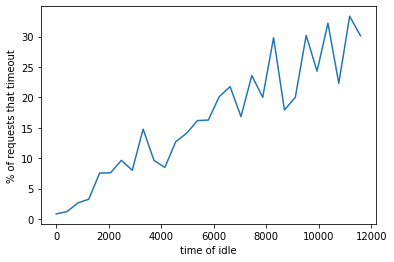

In [451]:
S = np.linspace(0, 12000, 30)

m = lambda x, s1, s2: (A.sleep_ms>=s1) & (A.sleep_ms<s2) & (A.curlexit==x)

plt.plot(
    S[:-1],
    [np.sum(m(28, s1, s2))/np.sum((A.sleep_ms>=s1) & (A.sleep_ms<s2))*100
         for s1,s2 in zip(S[:-1], S[1:])],
)

plt.ylabel("% of requests that timeout")
plt.xlabel("time of idle")
    
    


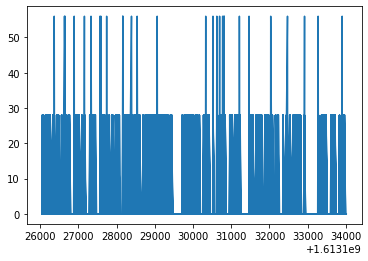

In [450]:
plt.plot(    
    A.time[A.time>0],
    A.curlexit[A.time>0]
)

In [ ]:

for ce in set(A.curlexit):
    a = A[A.curlexit == ce]
    plt.scatter(
        a.sleep_ms + np.random.rand(len(a)),
        a.size_mb + np.random.rand(len(a)),   
#        c=A.curlexit.astype(int),
        label=f"{ce} {len(a)} {len(a)/0.01/len(A):.3g}%",
        s=100,
    )

